# Tema 2: Otros recursos para el análisis textual

In [1]:
from pathlib import Path

PATH_DATA = Path.cwd().parent / 'data'

## Ejercicio 1
Análisis de sentimiento usando el lexicón de opinión de NLTK.

In [2]:
import nltk
from nltk.corpus import opinion_lexicon

# Las 3 opiniones del PDF
opinion1 = "Visceral, stunning and relentless film making. Dicaprio's Herculean, almost purely physical performance " \
           "and Hardy's wide eyed intensity coupled with the almost overwhelming beauty of the landscape - those " \
           "trees, the natural light, the sun peeking through the clouds, rendered the proceedings down to savage " \
           "poetry. A hypnotic, beautiful, exhausting film."

opinion2 = "I saw this film on Friday. For the first 40 minutes involving spoken dialogue they need not have " \
           "bothered. For me the dialogue was totally unintelligible with grunting, southern states drawl, " \
           "and coarse accent that made it impossible to understand what they were saying."

opinion3 = "It was an idiotic film that produces a magnificent fascination."

def sentiment(text):
    score = 0
    tokens = nltk.word_tokenize(text)
    for token in tokens:
        if token in opinion_lexicon.positive():
            score = score + 1
        if token in opinion_lexicon.negative():
            score = score - 1
    return score

print("Análisis de sentimiento con NLTK Opinion Lexicon:")
print("="*70)

for i, opinion in enumerate([opinion1, opinion2, opinion3], 1):
    score = sentiment(opinion)
    if score > 0: 
        result = 'Opinión positiva'
    elif score < 0: 
        result = 'Opinión negativa'
    else:
        result = 'Opinión neutra'
    
    print(f"\nOpinión {i}: {opinion[:60]}...")
    print(f"Puntuación: {score}")
    print(f"Resultado: {result}")

Análisis de sentimiento con NLTK Opinion Lexicon:

Opinión 1: Visceral, stunning and relentless film making. Dicaprio's He...
Puntuación: 0
Resultado: Opinión neutra

Opinión 2: I saw this film on Friday. For the first 40 minutes involvin...
Puntuación: -4
Resultado: Opinión negativa

Opinión 3: It was an idiotic film that produces a magnificent fascinati...
Puntuación: 1
Resultado: Opinión positiva


## Ejercicio 2
Análisis de sentimiento con SentiWordNet usando las mismas 3 opiniones.

In [3]:
import nltk
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import wordnet

# nltk.download('sentiwordnet', quiet=True)
# nltk.download('wordnet', quiet=True)

def get_sentiment_sentiwordnet(text):
    """Calcula el sentimiento usando SentiWordNet considerando todos los sentidos."""
    tokens = nltk.word_tokenize(text)
    sentiment_score = 0
    token_count = 0
    
    for word in tokens:
        # Obtener todos los synsets para todas las categorías gramaticales
        synsets = list(swn.senti_synsets(word))
        if not synsets:
            continue
        
        # Promediar los scores de todos los sentidos
        word_score = sum(synset.pos_score() - synset.neg_score() for synset in synsets) / len(synsets)
        sentiment_score += word_score
        token_count += 1
    
    if token_count == 0:
        return 0
    
    return sentiment_score / token_count

print("Análisis de sentimiento con SentiWordNet (todos los sentidos):")
print("="*70)

for i, opinion in enumerate([opinion1, opinion2, opinion3], 1):
    score = get_sentiment_sentiwordnet(opinion)
    
    if score > 0:
        result = 'Opinión positiva'
    elif score < 0:
        result = 'Opinión negativa'
    else:
        result = 'Opinión neutra'
    
    print(f"\nOpinión {i}: {opinion[:60]}...")
    print(f"Puntuación SentiWordNet: {score:.4f}")
    print(f"Resultado: {result}")

Análisis de sentimiento con SentiWordNet (todos los sentidos):

Opinión 1: Visceral, stunning and relentless film making. Dicaprio's He...
Puntuación SentiWordNet: 0.0077
Resultado: Opinión positiva

Opinión 2: I saw this film on Friday. For the first 40 minutes involvin...
Puntuación SentiWordNet: -0.0080
Resultado: Opinión negativa

Opinión 3: It was an idiotic film that produces a magnificent fascinati...
Puntuación SentiWordNet: 0.0731
Resultado: Opinión positiva


### Variante 2.1
Análisis de sentimiento considerando la categoría gramatical (PoS) del token.

In [4]:
# nltk.download('averaged_perceptron_tagger', quiet=True)

def penn_to_wn(tag):
    """Convierte las etiquetas POS de Penn Treebank a WordNet POS."""
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    elif tag.startswith('V'):
        return wordnet.VERB
    return None

def get_sentiment_with_pos(text):
    """Calcula el sentimiento usando SentiWordNet con filtrado por categoría gramatical."""
    tokens = nltk.word_tokenize(text)
    tagged_tokens = nltk.pos_tag(tokens)
    
    sentiment_score = 0
    token_count = 0
    
    for word, tag in tagged_tokens:
        wn_tag = penn_to_wn(tag)
        # Solo considerar nombres, adjetivos y adverbios
        if wn_tag not in (wordnet.NOUN, wordnet.ADJ, wordnet.ADV):
            continue
        
        synsets = list(swn.senti_synsets(word, wn_tag))
        if not synsets:
            continue
        
        # Promediar los scores de los sentidos que coinciden con la categoría gramatical
        word_score = sum(synset.pos_score() - synset.neg_score() for synset in synsets) / len(synsets)
        sentiment_score += word_score
        token_count += 1
    
    if token_count == 0:
        return 0
    
    return sentiment_score / token_count

print("Análisis de sentimiento con SentiWordNet + filtrado por PoS:")
print("="*70)

for i, opinion in enumerate([opinion1, opinion2, opinion3], 1):
    score = get_sentiment_with_pos(opinion)
    
    if score > 0:
        result = 'Opinión positiva'
    elif score < 0:
        result = 'Opinión negativa'
    else:
        result = 'Opinión neutra'
    
    print(f"\nOpinión {i}: {opinion[:60]}...")
    print(f"Puntuación (con PoS): {score:.4f}")
    print(f"Resultado: {result}")


Análisis de sentimiento con SentiWordNet + filtrado por PoS:

Opinión 1: Visceral, stunning and relentless film making. Dicaprio's He...
Puntuación (con PoS): 0.0184
Resultado: Opinión positiva

Opinión 2: I saw this film on Friday. For the first 40 minutes involvin...
Puntuación (con PoS): 0.0097
Resultado: Opinión positiva

Opinión 3: It was an idiotic film that produces a magnificent fascinati...
Puntuación (con PoS): 0.1979
Resultado: Opinión positiva


## Ejercicio 3
Evaluar el clasificador de sentimientos con un archivo CSV y métricas de rendimiento.

In [5]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Leer el archivo CSV con opiniones etiquetadas
df = pd.read_csv(str(PATH_DATA / 'textsSentimentsPNN.csv'))

# Aplicar el análisis de sentimiento con SentiWordNet y PoS
print("Procesando opiniones del archivo CSV...")
df['Predicción_Score'] = df['Text'].apply(get_sentiment_with_pos)

# Clasificar según el score
def classify_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Predicción'] = df['Predicción_Score'].apply(classify_sentiment)

# Calcular métricas de evaluación
y_true = df['Sentiment']
y_pred = df['Predicción']

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

print("\nMétricas de evaluación:")
print("="*70)
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred, labels=['Positive', 'Neutral', 'Negative'])
print(f"\nMatriz de confusión:")
print("                Pred_Pos  Pred_Neu  Pred_Neg")
for i, label in enumerate(['Positive', 'Neutral', 'Negative']):
    print(f"True_{label[:3]:8s} {conf_matrix[i]}")

print("\nNota: Cuanto más cercano a 1, mejor está clasificando el modelo.")

Procesando opiniones del archivo CSV...

Métricas de evaluación:
Accuracy:  0.6119
Precision: 0.4810
Recall:    0.6119
F1 Score:  0.5371

Matriz de confusión:
                Pred_Pos  Pred_Neu  Pred_Neg
True_Pos      [39  2  4]
True_Neu      [15  0  3]
True_Neg      [2 0 2]

Nota: Cuanto más cercano a 1, mejor está clasificando el modelo.


## Ejercicio 4
Clasificación de sentimiento con Naive Bayes usando el corpus de críticas de películas.

In [6]:
from nltk.corpus import movie_reviews
from nltk.classify import NaiveBayesClassifier

def word_feats(words):
    """Transforma las palabras del texto a un diccionario de características."""
    return dict([(word, True) for word in words])

# Obtener datos de entrenamiento y test
negids = movie_reviews.fileids('neg')
posids = movie_reviews.fileids('pos')

negfeats = [(word_feats(movie_reviews.words(fileids=[file])), 'neg') for file in negids]
posfeats = [(word_feats(movie_reviews.words(fileids=[file])), 'pos') for file in posids]

# Dividir en entrenamiento (75%) y test (25%)
negcutoff = int(len(negfeats) * 3 / 4)
poscutoff = int(len(posfeats) * 3 / 4)

trainfeats = negfeats[:negcutoff] + posfeats[:poscutoff]
testfeats = negfeats[negcutoff:] + posfeats[poscutoff:]

print(f"Entrenando clasificador Naive Bayes...")
print(f"Instancias de entrenamiento: {len(trainfeats)}")
print(f"Instancias de test: {len(testfeats)}")

# Entrenar el clasificador
classifier = NaiveBayesClassifier.train(trainfeats)

# Evaluar con el conjunto de test
accuracy = nltk.classify.util.accuracy(classifier, testfeats)
print(f"\nPrecisión en test: {accuracy:.4f}")

# Mostrar las características más informativas
print("\nCaracterísticas más informativas:")
classifier.show_most_informative_features(10)

# Probar con las 3 opiniones del ejercicio 1 y 2
print("\n" + "="*70)
print("Clasificación de las 3 opiniones:")
print("="*70)

for i, opinion in enumerate([opinion1, opinion2, opinion3], 1):
    prediction = classifier.classify(word_feats(opinion.split()))
    print(f"\nOpinión {i}: {opinion[:60]}...")
    print(f"Clasificación: {'Positiva' if prediction == 'pos' else 'Negativa'}")

Entrenando clasificador Naive Bayes...
Instancias de entrenamiento: 1500
Instancias de test: 500

Precisión en test: 0.7280

Características más informativas:
Most Informative Features
             magnificent = True              pos : neg    =     15.0 : 1.0
             outstanding = True              pos : neg    =     13.6 : 1.0
               insulting = True              neg : pos    =     13.0 : 1.0
              vulnerable = True              pos : neg    =     12.3 : 1.0
               ludicrous = True              neg : pos    =     11.8 : 1.0
                  avoids = True              pos : neg    =     11.7 : 1.0
             uninvolving = True              neg : pos    =     11.7 : 1.0
              astounding = True              pos : neg    =     10.3 : 1.0
             fascination = True              pos : neg    =     10.3 : 1.0
                 idiotic = True              neg : pos    =      9.8 : 1.0

Clasificación de las 3 opiniones:

Opinión 1: Visceral, stunning

## Ejercicio 5
Trabajar con el corpus Gutenberg y calcular frecuencias de palabras.

In [7]:
import nltk
from nltk.corpus import gutenberg
from nltk.probability import FreqDist

# Si es la primera vez, descomenta:
# nltk.download('gutenberg')

print("Archivos en el corpus Gutenberg:")
print(gutenberg.fileids())

text = gutenberg.words('austen-emma.txt')
print(f"\nTexto seleccionado: austen-emma.txt")
print(f"Total de palabras: {len(text)}")

fdist = FreqDist(text)

Archivos en el corpus Gutenberg:
['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']

Texto seleccionado: austen-emma.txt
Total de palabras: 192427


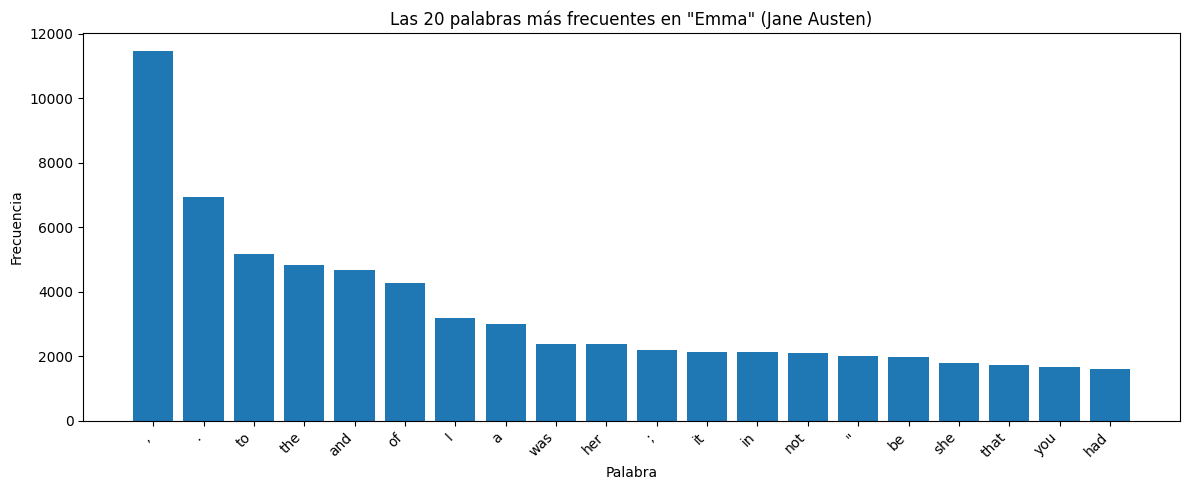

In [8]:
import matplotlib.pyplot as plt

n = 20
top = fdist.most_common(n)
words, counts = zip(*top)

plt.figure(figsize=(12, 5))
plt.bar(words, counts)
plt.title(f'Las {n} palabras más frecuentes en "Emma" (Jane Austen)')
plt.xlabel("Palabra")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Ejercicio 6
Trabajar con el corpus Treebank y extraer nombres propios.

In [9]:
from nltk.corpus import treebank

def showProperNouns(sentences, n):
    """Extrae y muestra los nombres propios más frecuentes (palabras individuales)."""
    proper_nouns = [word for sentence in sentences for (word, tag) in sentence if tag == 'NNP']
    fdist = nltk.FreqDist(proper_nouns)
    print(fdist.most_common(n))

# Apartado a: Extraer nombres propios de un texto específico
print("="*70)
print("Apartado a: Nombres propios en un texto específico (wsj_0045.mrg)")
print("="*70)
tagged_sentences = treebank.tagged_sents('wsj_0045.mrg')
showProperNouns(tagged_sentences, 10)

# Apartado b: Extraer nombres propios de todo el corpus (compuestos)
print("\n" + "="*70)
print("Apartado b: Nombres propios compuestos en todo el corpus")
print("="*70)

def extract_proper_nouns(sentences, n):
    """Extrae nombres propios compuestos (secuencias consecutivas de NNP)."""
    proper_nouns = []
    current_proper_noun = []
    
    for sentence in sentences:
        for (word, tag) in sentence:
            if tag == 'NNP':
                current_proper_noun.append(word)
            else:
                if current_proper_noun:
                    proper_nouns.append(' '.join(current_proper_noun))
                    current_proper_noun = []
        # No olvidar el último nombre propio si la oración termina con uno
        if current_proper_noun:
            proper_nouns.append(' '.join(current_proper_noun))
            current_proper_noun = []
    
    fdist = nltk.FreqDist(proper_nouns)
    return fdist.most_common(n)

tagged_sentences = treebank.tagged_sents()
print(f"Procesando {len(tagged_sentences)} oraciones del corpus...\n")
print("Los 50 nombres propios compuestos más frecuentes:")
most_common = extract_proper_nouns(tagged_sentences, 50)
for name, freq in most_common:
    print(f"  ('{name}', {freq})")

Apartado a: Nombres propios en un texto específico (wsj_0045.mrg)
[('Scoring', 11), ('High', 11), ('Learning', 9), ('CAT', 6), ('McGraw-Hill', 5), ('Kaminski', 4), ('Macmillan\\/McGraw', 4), ('Achievement', 3), ('Test', 3), ('California', 2)]

Apartado b: Nombres propios compuestos en todo el corpus
Procesando 3914 oraciones del corpus...

Los 50 nombres propios compuestos más frecuentes:
  ('U.S.', 197)
  ('New York', 73)
  ('Japan', 72)
  ('October', 61)
  ('Tuesday', 46)
  ('Congress', 45)
  ('September', 42)
  ('Treasury', 36)
  ('S&P', 35)
  ('Mrs. Yeargin', 34)
  ('Wall Street', 32)
  ('Columbia', 31)
  ('Chicago', 30)
  ('Big Board', 28)
  ('House', 25)
  ('New York Stock Exchange', 25)
  ('Inc.', 24)
  ('China', 24)
  ('Oct.', 24)
  ('Co.', 23)
  ('Nov.', 22)
  ('London', 22)
  ('Washington', 21)
  ('USX', 21)
  ('Mr. Hahn', 20)
  ('South Korea', 19)
  ('California', 19)
  ('March', 18)
  ('Tokyo', 18)
  ('Georgia Gulf', 18)
  ('Buick', 18)
  ('August', 17)
  ('Wednesday', 16)
